## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  54.581942   630.039866  0.743073  8.361338  1.468823
1  79.095727  1112.442842  0.008483  6.170479  0.058109
2  18.036306   237.987406  0.811367  6.207937  1.531208
3  61.954122   972.233810  0.498720  2.159902  1.243316
4  96.074495   200.686197  0.810942  2.520065  0.998005


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9648535	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.9555412	total: 72.4ms	remaining: 36.1s
2:	learn: 0.9464424	total: 72.9ms	remaining: 24.2s
3:	learn: 0.9372411	total: 73.3ms	remaining: 18.3s
4:	learn: 0.9285126	total: 73.7ms	remaining: 14.7s
5:	learn: 0.9206886	total: 74.2ms	remaining: 12.3s
6:	learn: 0.9103766	total: 74.6ms	remaining: 10.6s
7:	learn: 0.9003011	total: 75ms	remaining: 9.3s
8:	learn: 0.8927601	total: 75.4ms	remaining: 8.3s
9:	learn: 0.8814950	total: 75.8ms	remaining: 7.5s
10:	learn: 0.8722267	total: 76.1ms	remaining: 6.84s
11:	learn: 0.8632861	total: 76.5ms	remaining: 6.3s
12:	learn: 0.8558978	total: 76.8ms	remaining: 5.83s
13:	learn: 0.8477921	total: 77.2ms	remaining: 5.43s
14:	learn: 0.8385459	total: 77.5ms	remaining: 5.09s
15:	learn: 0.8300779	total: 77.9ms	remaining: 4.79s
16:	learn: 0.8222964	total: 78.2ms	remaining: 4.52s
17:	learn: 0.8149392	total: 78.5ms	remaining: 4.28s
18:	learn: 0.8086191	total: 78.9ms	remaining: 4.0

47:	learn: 0.6204548	total: 92.2ms	remaining: 1.83s
48:	learn: 0.6156065	total: 92.8ms	remaining: 1.8s
49:	learn: 0.6109381	total: 93.3ms	remaining: 1.77s
50:	learn: 0.6060786	total: 93.7ms	remaining: 1.74s
51:	learn: 0.6013282	total: 94.2ms	remaining: 1.72s
52:	learn: 0.5966332	total: 94.6ms	remaining: 1.69s
53:	learn: 0.5918404	total: 95.1ms	remaining: 1.67s
54:	learn: 0.5873742	total: 95.5ms	remaining: 1.64s
55:	learn: 0.5835997	total: 96ms	remaining: 1.62s
56:	learn: 0.5789087	total: 96.4ms	remaining: 1.59s
57:	learn: 0.5742606	total: 96.8ms	remaining: 1.57s
58:	learn: 0.5698999	total: 97.2ms	remaining: 1.55s
59:	learn: 0.5656713	total: 97.7ms	remaining: 1.53s
60:	learn: 0.5611914	total: 98.1ms	remaining: 1.51s
61:	learn: 0.5571179	total: 98.4ms	remaining: 1.49s
62:	learn: 0.5528545	total: 98.7ms	remaining: 1.47s
63:	learn: 0.5487540	total: 99.2ms	remaining: 1.45s
64:	learn: 0.5445402	total: 99.7ms	remaining: 1.43s
65:	learn: 0.5404776	total: 100ms	remaining: 1.42s
66:	learn: 0.536

250:	learn: 0.2316271	total: 182ms	remaining: 543ms
251:	learn: 0.2312246	total: 183ms	remaining: 542ms
252:	learn: 0.2307756	total: 183ms	remaining: 540ms
253:	learn: 0.2303770	total: 183ms	remaining: 538ms
254:	learn: 0.2293751	total: 184ms	remaining: 537ms
255:	learn: 0.2290630	total: 184ms	remaining: 535ms
256:	learn: 0.2286367	total: 185ms	remaining: 534ms
257:	learn: 0.2276850	total: 185ms	remaining: 532ms
258:	learn: 0.2268155	total: 186ms	remaining: 531ms
259:	learn: 0.2254102	total: 186ms	remaining: 529ms
260:	learn: 0.2246481	total: 186ms	remaining: 528ms
261:	learn: 0.2243032	total: 187ms	remaining: 526ms
262:	learn: 0.2228121	total: 187ms	remaining: 524ms
263:	learn: 0.2223914	total: 187ms	remaining: 522ms
264:	learn: 0.2219808	total: 188ms	remaining: 521ms
265:	learn: 0.2216327	total: 188ms	remaining: 519ms
266:	learn: 0.2212305	total: 189ms	remaining: 518ms
267:	learn: 0.2208266	total: 189ms	remaining: 516ms
268:	learn: 0.2204408	total: 189ms	remaining: 514ms
269:	learn: 

467:	learn: 0.1225252	total: 273ms	remaining: 310ms
468:	learn: 0.1224083	total: 274ms	remaining: 310ms
469:	learn: 0.1220736	total: 274ms	remaining: 309ms
470:	learn: 0.1215566	total: 275ms	remaining: 308ms
471:	learn: 0.1214821	total: 275ms	remaining: 307ms
472:	learn: 0.1213677	total: 275ms	remaining: 307ms
473:	learn: 0.1209198	total: 276ms	remaining: 306ms
474:	learn: 0.1208062	total: 276ms	remaining: 305ms
475:	learn: 0.1200768	total: 277ms	remaining: 304ms
476:	learn: 0.1196313	total: 277ms	remaining: 304ms
477:	learn: 0.1193072	total: 277ms	remaining: 303ms
478:	learn: 0.1191962	total: 278ms	remaining: 302ms
479:	learn: 0.1187787	total: 278ms	remaining: 301ms
480:	learn: 0.1183464	total: 279ms	remaining: 301ms
481:	learn: 0.1179155	total: 279ms	remaining: 300ms
482:	learn: 0.1176016	total: 280ms	remaining: 300ms
483:	learn: 0.1172936	total: 280ms	remaining: 299ms
484:	learn: 0.1171846	total: 281ms	remaining: 298ms
485:	learn: 0.1170769	total: 281ms	remaining: 297ms
486:	learn: 

684:	learn: 0.0801844	total: 362ms	remaining: 167ms
685:	learn: 0.0798427	total: 363ms	remaining: 166ms
686:	learn: 0.0798146	total: 363ms	remaining: 165ms
687:	learn: 0.0797599	total: 363ms	remaining: 165ms
688:	learn: 0.0797323	total: 363ms	remaining: 164ms
689:	learn: 0.0796374	total: 364ms	remaining: 163ms
690:	learn: 0.0793040	total: 364ms	remaining: 163ms
691:	learn: 0.0792463	total: 365ms	remaining: 162ms
692:	learn: 0.0792193	total: 365ms	remaining: 162ms
693:	learn: 0.0791368	total: 365ms	remaining: 161ms
694:	learn: 0.0790509	total: 366ms	remaining: 160ms
695:	learn: 0.0789490	total: 366ms	remaining: 160ms
696:	learn: 0.0789224	total: 366ms	remaining: 159ms
697:	learn: 0.0786695	total: 367ms	remaining: 159ms
698:	learn: 0.0785773	total: 367ms	remaining: 158ms
699:	learn: 0.0784964	total: 367ms	remaining: 157ms
700:	learn: 0.0782052	total: 368ms	remaining: 157ms
701:	learn: 0.0777306	total: 368ms	remaining: 156ms
702:	learn: 0.0777043	total: 368ms	remaining: 156ms
703:	learn: 

890:	learn: 0.0536495	total: 453ms	remaining: 55.4ms
891:	learn: 0.0534884	total: 453ms	remaining: 54.9ms
892:	learn: 0.0533517	total: 454ms	remaining: 54.4ms
893:	learn: 0.0531047	total: 455ms	remaining: 53.9ms
894:	learn: 0.0529496	total: 455ms	remaining: 53.4ms
895:	learn: 0.0529036	total: 456ms	remaining: 52.9ms
896:	learn: 0.0528581	total: 457ms	remaining: 52.5ms
897:	learn: 0.0527012	total: 457ms	remaining: 52ms
898:	learn: 0.0526560	total: 458ms	remaining: 51.4ms
899:	learn: 0.0525021	total: 458ms	remaining: 50.9ms
900:	learn: 0.0523595	total: 459ms	remaining: 50.5ms
901:	learn: 0.0522194	total: 460ms	remaining: 50ms
902:	learn: 0.0520676	total: 460ms	remaining: 49.5ms
903:	learn: 0.0520226	total: 461ms	remaining: 49ms
904:	learn: 0.0519782	total: 462ms	remaining: 48.5ms
905:	learn: 0.0518402	total: 462ms	remaining: 48ms
906:	learn: 0.0517961	total: 463ms	remaining: 47.5ms
907:	learn: 0.0516601	total: 464ms	remaining: 47ms
908:	learn: 0.0516163	total: 464ms	remaining: 46.5ms
909

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


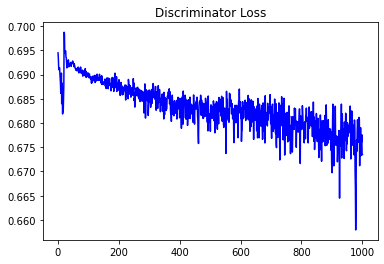

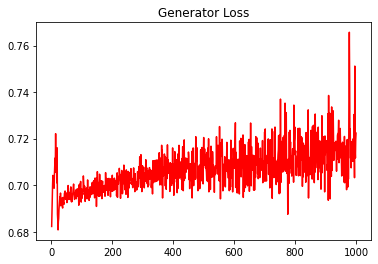

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21039780875637698


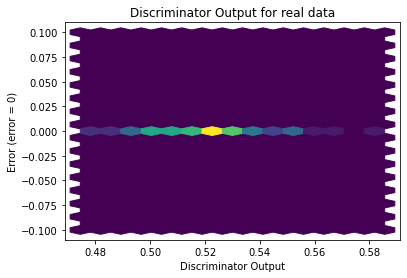

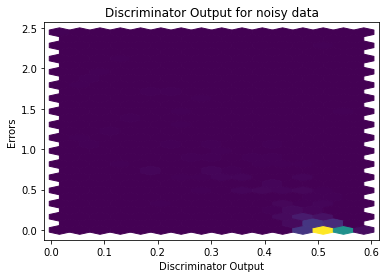

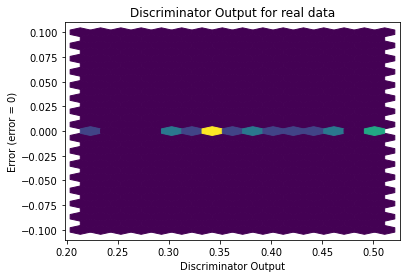

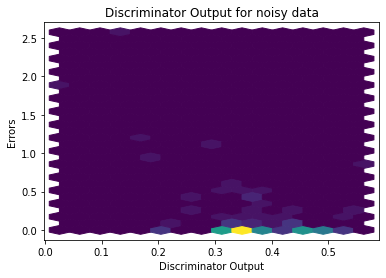

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1721]], requires_grad=True)
